In [9]:
# conda activate sfmr
import __init__ as f
import xarray as xr
import pandas as pd
import numpy as np

In [2]:
f.prepare_sfmr

<function __init__.prepare_sfmr(sfmr_file, track_df, acq_time)>

In [3]:
# SFMR
p_sfmr  = '/home/arthur/data/cyclobs/sfmr/noaa_aoml_hrd/2019/dorian/AFRC_SFMR20190830U3.nc'
ds_sfmr = xr.open_dataset(p_sfmr)
print('Time interval: ', ds_sfmr.attrs['TimeInterval'])

Time interval:  22:56:32-04:40:27


In [4]:
# SCAT or RAD
p_sct  = '/home/arthur/data/scatterometer/KNMI/product_JF_rotated_filtered_v2/POLAR/2019/AL052019/POL_ascat_20190830_004500_metopa_66735_srv_o_125_ovw.nc'
ds_sct = xr.open_dataset(p_sct)
P_SCT  = '/home/arthur/data/scatterometer/KNMI/product_JF_v2/' + ds_sct.data_file.item()
DS_SCT = xr.open_dataset(P_SCT)

In [36]:
track_df = pd.DataFrame(
    data={
        'datetime': DS_SCT.track_time,
        'lon':      DS_SCT.__track_lon,
        'lat':      DS_SCT.__track_lat,
    }
)

# acq_time = pd.to_datetime(ds_sct.acquisition_time.item())
acq_time = ds_sct.acquisition_time.values
acq_time = pd.to_datetime(acq_time.astype('datetime64[s]')) # round to nearest second and convert to datetime object

In [38]:
sfmr_df  = f.prepare_sfmr(p_sfmr, track_df, acq_time)

INFO:coloc_config.py:/home/arthur/data/cyclobs/sfmr/noaa_aoml_hrd/2019/dorian/AFRC_SFMR20190830U3.nc
INFO:coloc_config.py:timing sfmr_resample : 0.0s. mem: +0.0Mb
INFO:coloc_config.py:timing spatial_downsample : 0.0s. mem: +0.0Mb
INFO:coloc_config.py:timing sfmr_translate : 0.4s. mem: +0.0Mb


<AxesSubplot:xlabel='time'>

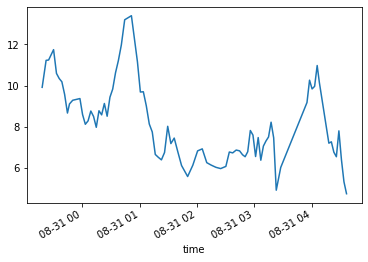

In [42]:
sfmr_df.SWS.plot()